<a href="https://colab.research.google.com/github/Glifoyle/test-repo/blob/master/CVBDLU1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--------------------------------------------------
INTRODUCTION TO COMPUTER VISION AND DEEP LEARNING
----------------------------------


NOTE: The following cell will donwload files to the computer where you are running this notebok. If you are running this in google colab, that will be a remote machine, but you can see them by clicking on the "folder" icon to the left of this cell. Be sure to delete unnecessary files as not to run out of space and remember that colab erases all files when a session ends, so if you are using it you will have to run this cell at the start of every session.

In [ ]:
import os
if not os.path.exists('circles.png'):
    !wget https://www.dropbox.com/s/9hk2bmgakdpulk8/circles.png?dl=0
    !mv circles.png?dl=0 circles.png

if not os.path.exists('tanuki.jpg'):
    !wget https://www.dropbox.com/s/9i7ulxfhe9plj2h/tanuki.jpg?dl=0
    !mv tanuki.jpg?dl=0 tanuki.jpg

--2024-02-27 05:15:13--  https://www.dropbox.com/s/9hk2bmgakdpulk8/circles.png?dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.6.18, 2620:100:6019:18::a27d:412
Connecting to www.dropbox.com (www.dropbox.com)|162.125.6.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/9hk2bmgakdpulk8/circles.png [following]
--2024-02-27 05:15:13--  https://www.dropbox.com/s/raw/9hk2bmgakdpulk8/circles.png
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucaa91d3549bdf69d4b8bcea7013.dl.dropboxusercontent.com/cd/0/inline/COAdVCHWBZZc939JIUeg1unetOpYiOx2o0rvchqyFB22afTzHCJQFJaDtdp-CSqaEl3jmMvQzcj673mDGnJ9uHiCi_6EHTLUdOXwK0oX11eGNDEMarZpkZDOVDfqw_6_hzIVNfoMrhrXmhjA3gSK3kGE/file# [following]
--2024-02-27 05:15:13--  https://ucaa91d3549bdf69d4b8bcea7013.dl.dropboxusercontent.com/cd/0/inline/COAdVCHWBZZc939JIUeg1unetOpYiOx2o0rvchqyFB22afTzHCJQFJaDtdp-CSqaEl3jmMvQzcj673mDGnJ9uHiCi_6EHTLUdOXw

## Before we start, environments, packages...

In this course we will work with several well known Python libraries so I will assume that you are familiar with [Python Environments](https://realpython.com/python-virtual-environments-a-primer/) and maybe you are even like me and work with [Anaconda](https://docs.anaconda.com/anaconda/install/). In any case you are going to want to know how to [install python packages in environments](https://datatofish.com/install-package-python-using-pip/). I generally do not do this, but notice that you can even do it [from the notebook itself](https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/). And now, on with the show...

# UNIT 1, IMAGE BASICS

In this unit we will start speaking about computer vision. Humans are a type of animal that is able to adapt to its environment better than most. In order to do this, humans have, for all their history, used their brains (yes, we do that occassionally) to design tools to do new things. From the sharpened flint axes that gave primitive humans substitute "sharp claws" to hunt to the levers and pulleys that were recorded as playing a defining impact in the siege of Syracuse more than 2000 years ago, humans have striven to design new ways to change the world around.

Computers in particular are one such machine that shapes our world. They allow us to perform simple mathematic operations very fast and, as we have been seeing in previous subjects, process large amounts of data efficiently. We access the world around us through our senses and chief among those is our Vision. If we could teach computers to process visual information in a way similar to what we do, we could use their huge processing power to "see" further, better, for longer periods of time.

The scientific discipline that tries to do just that: **teach computers to "see" as humans do** is called <u>Computer Vision</u> and in this course we will:

- See its basic definitions  
- Learn about some libraries that implement some of its algorithms  
- Develop practical applications, mostly directed towards drone image analysis  

Computer Vision is being used today to detect cancers in early stages so lives can be saved, design more efficient solar energy installation or detect invasive species in endangered ecosystems. However, Computer Vision is also used for surveillance in authoritarian states or to guide weapons in war. As with every tool, it is our duty to learn how to use it for good, to understand its strenghts and limitation and to "blow the whistle" to denounce its immmoral uses.

## What is an image?

When we perceive the world, light interacts with objects (bounces of them, passes through them...) and end up hitting our eyes. Our eyes receive these signals and convey them to our brains that build a representation of the world around us. But what happens when we want to remember how something looks like or we want to tell someone else about how something looked like?

Well, we use _images_ for that.

For the purpose of this course, **an image is a representation of reality by using some codification that allows us to retrieve visual information.**

That was a bit dense wasn't it? An example will probably help us. The first recored occurrences of images produced by humans are cave paintings. People then smeared dirt and animal blood in cave walls to represent the animals that they hunted. The contrast between the smeared black or red substances and the lighter cave wall allowed them (among other things) to show and remember what those animals looked like.

Since then, many ways to create images have been devised. Photography cameras for example, capture light in a way that resembles how our eyes work. This shows us that we know how to store visual information in a way that is very natural for us to later interpret. But how do we then rely that captured information so that others can "see" it too? There are many ways to do this, but at this moment I want to focus on one particular way of constructing images:

We can, **create images using points**

![Puntillism](https://www.publicdomainpictures.net/pictures/250000/nahled/pointillist-rainbow.jpg)


This image, downloaded [from this website](https://www.publicdomainpictures.net/en/view-image.php?image=242488&picture=pointillist-rainbow) shows an image constructed by putting many points of different colors together. Following this idea in a slighlty more systematic way, we could build images by combining many small points, each with their own color and distributed uniformly (all points having the same size, being set up in a regular grid) we could make images that are both very good for picturing reality and easier for computers to process. We call this type of images, _Digital images_.

## Digital images

Digital images represent the world around us using "properly organized points", called **Pixels**.

Pixels in digital images:

- Represent the smallest unit of information in the image.  
- Are placed in a regular grid, so they form a 2D matrix (more on this in a second) and we always have the same distance both in the x coordinate and the y coordinate from every pixel to its nearest neighborg.  
- Contain different information depending on the type of images. For example, to represent color, they contain a list of three values representing Red-Green-Blue (RGB) color intensities. Black and white (also called binary) images contains just 0 (black) or 1 (white). Finally, grayscale images usually contain a value between 0 (black) and 255 (white) to represent all lighter or darker shades of gray.  

### Matrices

Matrices are a very useful mathematical structure that, for our purposes here we will just consider as two-dimensional lists. Each position in a matrix can be accessed by using two indices using the following notation:

myMatrix[index1,index2]

Let's see them in Python!

In [ ]:
import numpy as np
from random import randint
from sympy import Matrix, init_printing
init_printing()

# There are many ways to create matrices. The "Matrix" class is one of them.
# In computer vision we usually start by reading images prepared beforehand as matrices
# so we will not worry too much about how to create matrices just yet
myMatrix = Matrix(np.random.random((3,3)))

print("a 3x3 matrix of random real numbers:")
display(myMatrix)

print("Shape of my matrix")

#let's show a few random elements of the matrix
for i in range(3):
    x = randint(0,myMatrix.shape[0]-1)
    y = randint(0,myMatrix.shape[1]-1)
    print("Showing element in position "+str(x)+" "+str(y)+" : "+str(myMatrix[x,y]))

a 3x3 matrix of random real numbers:


⎡0.214475818483853   0.347735572566721  0.924701808718193⎤
⎢                                                        ⎥
⎢0.0185089128518637  0.774056566940975  0.718243258556325⎥
⎢                                                        ⎥
⎣0.394298696649093   0.411134295330176  0.346950762160185⎦

Shape of my matrix
Showing element in position 0 0 : 0.214475818483853
Showing element in position 1 1 : 0.774056566940975
Showing element in position 2 0 : 0.394298696649093


## Images as Matrices of Pixels

### Creating a simple drawing:

This is a bit of an academic exercise as we will generally capture the images that we work with with some type of sensor (mostly and RGB camera mounted on a drone). However, in order to see a few more details about how images are built, it helps to just create an image from scratch:

In [ ]:
#Let's include some libraries that we will use
from matplotlib import pyplot as plt
import numpy as np
import cv2

# This will allow the images that we create to be displayed nicely within the notebook
%matplotlib inline

In the previous cell we have imported three important libraries:

- The [numpy](https://numpy.org/) library, that contains all sorts of algorithms and data types for numeric computations.  

- The [matplolib](https://matplotlib.org/) library, that will allow us to display our images nicely within the jupyter notebook.

- The [opencv](https://docs.opencv.org/4.x/d6/d00/tutorial_py_root.html) library, that contains computer vision algorithms that we will be exploring extensively in this course.

Let's now use the opencv library to create a simple image and draw some shapes into it. If you want to dig deeper into it I recomemend having a look at [the opencv tutorial that gave me the idea for this example](https://docs.opencv.org/3.4/d3/d96/tutorial_basic_geometric_drawing.html)

First, let us just define a color image:

In [ ]:
import numpy as np


# We will create an image with 400x400 pixels
W = 400

# We will First create a color image, so every pixel will contain 3 values (RGB)
# So, the "size of our image will be 400x400x3"
size = W, W, 3
# First, let us just create a matrix with all the right sizes but with a zero at every position
# for matrix creation, we use numpy
myColorImage = np.zeros(size, dtype=np.uint8)

#Let's print the first element of the matrix:
print("First element of an empty color image")
print(myColorImage[0,0])

First element of an empty color image
[0 0 0]


As you can see, a color image is a 2D matrix and at each position we have a color pixel made up of 3 values (RGB). In this case, we have a color image of size 400x400x, so we have a 400x400 3D matrix with all of its 160 000 pixels with value (0,0,0) which corresponds to black. We can show it as:

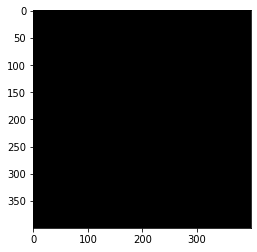

In [ ]:
plt.imshow(myColorImage,cmap="binary")

Now let us define also a binary image of the same size.

In [ ]:
import numpy as np


# We will create an image with 400x400 pixels
W = 400

# We will First create a color image, so every pixel will contain 3 values (RGB)
# So, the "size of our image will be 400x400x3"
size = W, W, 3

# First, let us just create a matrix with all the right sizes but with a zero at every position
# for matrix creation, we use numpy
myColorImage = np.zeros(size, dtype=np.uint8)

#Let's print the first element of the matrix:
print("First element of an empty color image")
print(myColorImage[0,0])

# Now, let's define a Binary image, with the same size, but only one number in each pixel
size2 = W, W, 1
myBinaryImage = np.zeros(size2, dtype=np.uint8)
print("First element of an empty Binary image")
print(myBinaryImage[0,0])

First element of an empty color image
[0 0 0]
First element of an empty Binary image
[0]


As you can see, we now have defined two images with the same distribution of pixels, one of them is a color image and is full of (0,0,0) and the other one is a binary image full of 0 values. Both images are just black and full of zeros!

Let's use the simple "rectangle" and "ellipse" functions to draw something in our images:

First element of an empty color image


<Figure size 432x288 with 0 Axes>

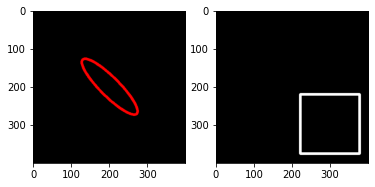

In [ ]:
import cv2
import numpy as np


# We will create an image with 400x400 pixels
W = 400

# We will First create a color image, so every pixel will contain 3 values (RGB)
# So, the "size of our image will be 400x400x3"
size = W, W, 3

# First, let us just create a matrix with all the right sizes but with a zero at every position
# for matrix creation, we use numpy
myColorImage = np.zeros(size, dtype=np.uint8)

#Let's print the first element of the matrix:
print("First element of an empty color image")

# Now, let's define a Binary image, with the same size, but only one number in each pixel
size2 = W, W
#size2 = W, W, 1 this worked in jupyter notebook but not in colab, differences in matplotlib version probably

myBinaryImage = np.zeros(size2, dtype=np.uint8)

#Draw an elipse in the color image
line_type = 8
angle = 45
thickness = 5
cv2.ellipse(myColorImage,(W // 2, W // 2),(W // 4, W // 16),angle,0,360,(255, 0, 0),thickness,line_type)

# also, draw a rectangle in the binary image
cv2.rectangle(myBinaryImage, (220,220) , (375,375), 255, thickness)

plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(1,2)

# use the created array to output your multiple images. In this case I have stacked 4 images vertically
axarr[0].imshow(myColorImage)
axarr[1].imshow(myBinaryImage,cmap=plt.cm.gray)

plt.show()

Now our images are not full of zeros any more!


### Reading images from file:

Generally, we will not be drawing images but processing images that someone else created or that we acquired using some device (a drone?). Let's open some images and show them in python, we will start by reading an image from a file.

<span style="color:blue">NOTE: You should make sure that you have the "circles.png" file in the same folder as this notebook. If you are running this in colab I probably already took care of it for you.</span>.

To read an image from file, just use opencv's "imread" function. Basically this is a function that receives two arguments, the path to an image file and a "read mode" [flag](https://docs.opencv.org/3.4/d8/d6a/group__imgcodecs__flags.html) that tells it what type of image it is reading. See [here](https://docs.opencv.org/3.4/d4/da8/group__imgcodecs.html) for more details.

circles.png  sample_data  tanuki.jpg
0
255


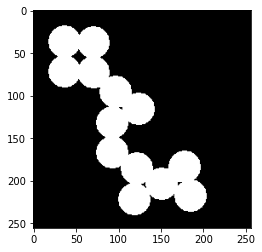

In [ ]:
# Reading an image
!ls
path="circles.png"
image = cv2.imread(path,cv2.IMREAD_GRAYSCALE)

# Let us print a couple of pixels, this one is black
print(image[0][0])

# this one is white
print(image[30][20])

#now let us show the image.
plt.imshow(image,cmap=plt.cm.gray)

So, we have read a nice binary image from a file showing a bunch of white circles over a black background.

To be fully precise, this is a grayscale image. We are treating it as binary because we have given all its pixels either a 0 (black) or a 255 (white) value. But we can also give pixels any value in between 0 and 255.

Let's add a gray rectangle:

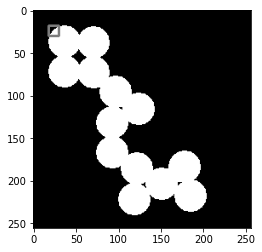

In [ ]:
# Start coordinate, here (5, 5)
# represents the top left corner of rectangle
start_point = (18, 18)

# Ending coordinate, here (220, 220)
# represents the bottom right corner of rectangle
end_point = (30, 30)

# Line thickness of 2 px
thickness = 2

subimage = image.copy()[18:30,18:30]

# Using cv2.rectangle() method
# Draw a grey rectangle
image = cv2.rectangle(image, start_point, end_point, 125, thickness)

plt.imshow(image,plt.cm.gray)

Now our image has three gray levels. Let's cut a subimage, to do so, we only need to select the part of the image matrix that we want using good old-fashioned python list slicing.

⎡125  125  125  125  125  125  125  125  125  125  125  125⎤
⎢                                                          ⎥
⎢125  125  125  125  125  125  125  125  125  125  125  125⎥
⎢                                                          ⎥
⎢125  125   0    0    0    0    0    0    0    0   255  125⎥
⎢                                                          ⎥
⎢125  125   0    0    0    0    0    0    0   255  255  125⎥
⎢                                                          ⎥
⎢125  125   0    0    0    0    0   255  255  255  255  125⎥
⎢                                                          ⎥
⎢125  125   0    0    0    0   255  255  255  255  255  125⎥
⎢                                                          ⎥
⎢125  125   0    0    0   255  255  255  255  255  255  125⎥
⎢                                                          ⎥
⎢125  125   0    0   255  255  255  255  255  255  255  125⎥
⎢                                                          ⎥
⎢125  125   0    0   255

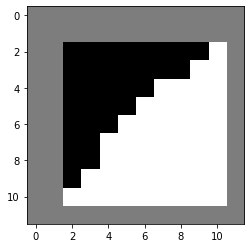

In [ ]:
from sympy import Matrix, init_printing
init_printing()

# Select a part of the image using list slicing.
subimage = image.copy()[18:30,18:30]

# print the subimage as a matrix
display(Matrix(subimage))

# Also show it on the screen
plt.imshow(subimage,plt.cm.gray)

As you can see, our subimage is a grayscale image that shows the border of one of the circles:

- Values inside the circle appear as white or 255.  
- Values oustide the circle appear as black or 0.  
- The values in the gray square appear as gray or 125.


Reading RGB images in opencv works similary:

In [ ]:
path="tanuki.jpg"
img = cv2.imread(path,cv2.IMREAD_COLOR)

So with that simple command we have ourselves a nice color RGB image, right?

well... not so fast. As it turns out, opencv does not use the RGB color format but... BGR. Yep, that is not a typo, for [some reason](https://learnopencv.com/why-does-opencv-use-bgr-color-format/), opencv expects the colors in pixels to be swapped, Blue is first, green is second and Red is a sad and lonely third. This, along with the fact that [rows and columns in images are also reversed](https://stackoverflow.com/questions/25642532/opencv-pointx-y-represent-column-row-or-row-column) are some of the little quirks that this otherwise hugely useful library has.

So, if we want to show images using something that is NOT opencv (like matplotlib), we need to un-swap the colors. We can do this with some more list slicing

In [ ]:
# Translate from BGR to RGB
img2 = img[:,:,::-1]

# now img contains the BGR version and img2 the RGB version, let us show them both

f, axarr = plt.subplots(1,2)
axarr[0].imshow(img)
axarr[1].imshow(img2)
plt.show()

NameError: ignored

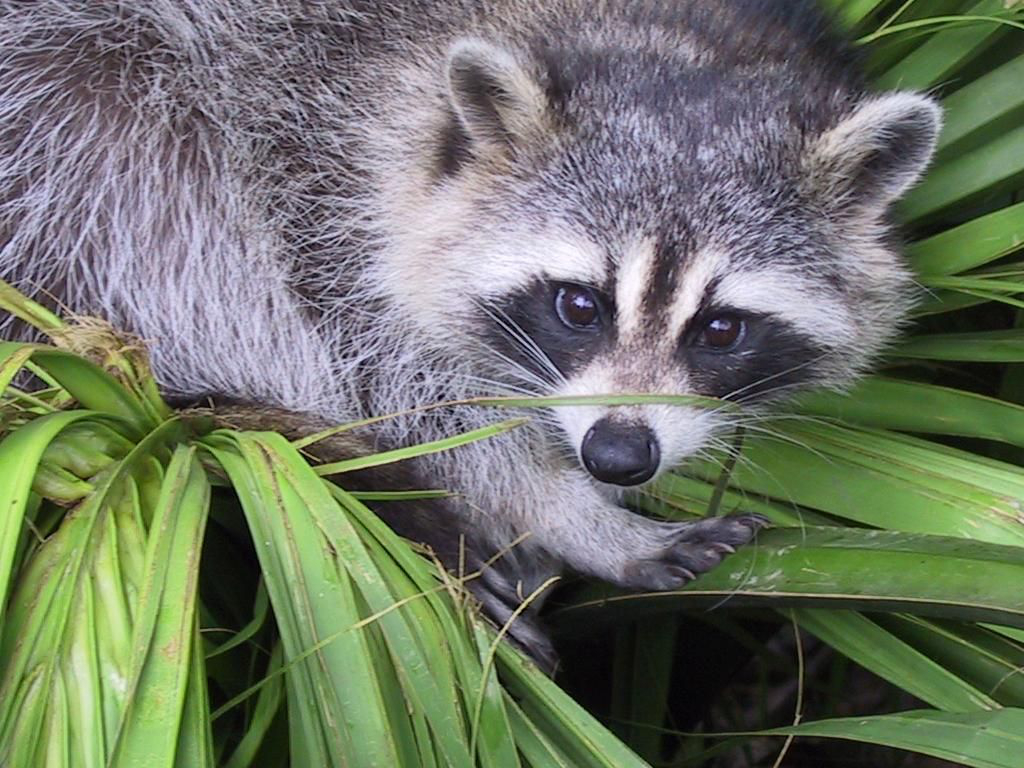

In [ ]:
from google.colab.patches import cv2_imshow

# to check that the right image contains the real colors, we can show the image in opencv directly
# (opens a new window)

image = cv2.imread('tanuki.jpg')
cv2_imshow(image)
cv2.waitKey(0)
cv2.destroyAllWindows()

# note, opencv and jupyter notebook do not play well together, to close the image that pops up press any key,
# if you just close the window the notebook may become unresponsive and you will need to restart it.

In this lesson we have seen some of the foundations of computer vision. We have looked at images, what are they for?, what are they made of? and we have used opencv to create very simple images, read them from file and do some simple manipulations.

We have also used the fact that images are matrices of pixels to show their structure clearly by showing them on the notebook side by side to their numerical representation and by doing simple slicing tricks that have allowed us to extract a sub image or transform between the RGB and BGR image formats.

# Exercises :

## Exercise 1:

Find out how to store images in your hard drive using opencv's "imwrite" method. Open the "circles.png" image, reverse its grayscale values (you can use bitwise not or im = 255 - im for that) and store it in the same folder as a file named "selcirc.png".

In [ ]:
# Exercise 1

## Exercise 2:


Read the "tanuki,jpg" image and store only its "Red" channel. Be careful with opencv's color coding! . Store the result in a file called "red_tanuki.png". Do not worry about the change in image format, just store it with a name ending in ".png" and opencv will sort out the format conversion on its own.

In [ ]:
# Exercise 2